### bioethanol and wild type S.cerevisiae strains comparision
1. ssGEMs predicted different fluxes analysis
2. TPM different expression analysis
3. Some specific rxn analysis： r_0486 , r_0366 ,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

In [2]:
# load strain info
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)

df_strain_info['sub_type'].value_counts()

Wine            422
Wild            394
Fermentation    258
Human           180
Beer            180
0               126
Sake             55
Bakery           52
Bioethanol       40
Soil             39
Industrial       35
Distillery       32
Dairy            27
Insect           21
Lab              19
Cider            17
Name: sub_type, dtype: int64

#### 1.different fluxes comparision: wild type vs bioethanol

In [3]:
# load differnet flux analysis result
df_flux_sig_diff=pd.read_csv('code/6.anaerobic_growth_analysis/output/bioethanol_vs_wt_different_flux_analysis.csv',index_col=0)
df_flux_sig_diff

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
r_0004,1.881055e-01,1.889501e-01,1.855896e-08,0.725598,0.723653,0.033369,-4.905334,-25.683309,25.683309,1.855896e-09,normal
r_0005,4.753648e-62,5.310108e-62,9.977893e-01,61.322973,50.000000,0.036398,-4.779994,-0.003193,0.003193,9.977893e-02,normal
r_0006,4.753648e-62,5.310108e-62,9.977893e-01,61.322973,50.000000,0.012161,-6.361569,-0.003193,0.003193,9.977893e-02,normal
r_0016,4.452886e-61,4.875414e-61,1.002137e+00,60.351358,50.000000,0.010704,-6.545732,0.003080,0.003080,1.002137e-01,normal
r_0018,4.452886e-61,4.875414e-61,1.002137e+00,60.351358,50.000000,0.015897,-5.975064,0.003080,0.003080,1.002137e-01,normal
...,...,...,...,...,...,...,...,...,...,...,...
r_4063,1.851436e-01,1.868895e-01,9.999631e-01,0.732491,0.728415,0.048304,-4.371699,-0.000053,0.000053,9.999631e-02,normal
r_4065,1.851436e-01,1.868895e-01,9.999631e-01,0.732491,0.728415,0.048304,-4.371699,-0.000053,0.000053,9.999631e-02,normal
r_4262,1.164468e-02,1.212962e-02,2.310223e-01,1.933872,1.916153,0.054885,-4.187444,-2.113896,2.113896,2.310223e-02,normal
r_4598,1.851436e-01,1.868895e-01,9.999631e-01,0.732491,0.728415,0.048304,-4.371699,-0.000053,0.000053,9.999631e-02,normal


- plot volcano plot by omicverse package in wsl 

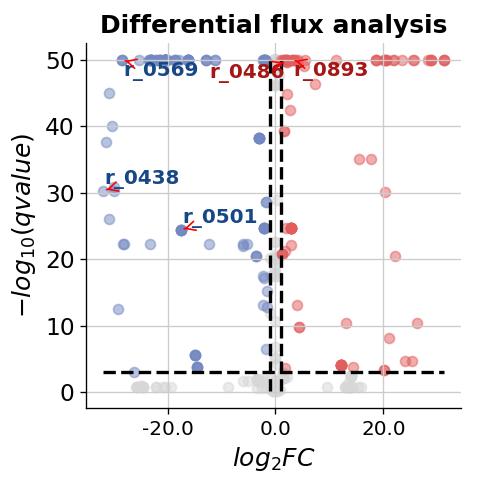

##### Pathway enrichment

In [7]:
def geneset_plot(enrich_res,num:int=10,node_size:list=[5,10,15],
                        cax_loc:int=1,cax_fontsize:int=12,
                        fig_title:str='',fig_xlabel:str='Fractions of genes',
                        figsize:tuple=(2,4),cmap:str='YlGnBu',
                        text_knock:int=2,text_maxsize:int=20):
    """
    Plot the gene set enrichment result.

    Arguments:
        num: The number of enriched terms to plot. Default is 10.
        node_size: A list of integers defining the size of nodes in the plot. Default is [5,10,15].
        cax_loc: The location of the colorbar on the plot. Default is 2.
        cax_fontsize: The fontsize of the colorbar label. Default is 12.
        fig_title: The title of the plot. Default is an empty string.
        fig_xlabel: The label of the x-axis. Default is 'Fractions of genes'.
        figsize: The size of the plot. Default is (2,4).
        cmap: The colormap to use for the plot. Default is 'YlGnBu'.
        text_knock: The number of characters to knock off the end of the term name. Default is 2.
        text_maxsize: The maximum fontsize of the term names. Default is 20.

    Returns:
        A matplotlib.axes.Axes object.
    
    """
    fig, ax = plt.subplots(figsize=figsize)
    plot_data2=enrich_res.sort_values('P-value')[:num].sort_values('logc')
    # set Term as index
    plot_data2.index=plot_data2['Term']

    st=ax.scatter(plot_data2['fraction'],range(len(plot_data2['logc'])),
            s=plot_data2['num']*30,linewidths=1,edgecolors='black',c=plot_data2['logp'],cmap=cmap)
    # ax.yaxis.tick_right()
    # set plot_data2.index as the label of y-axis
    ax.set_yticks(range(len(plot_data2['logc'])))
    ax.set_yticklabels(plot_data2.index,fontsize=8,weight='bold')

    plt.xticks(fontsize=8,weight='bold')
    plt.title(fig_title,fontsize=12,weight='bold')
    plt.xlabel(fig_xlabel,fontsize=10,weight='bold')

    #fig = plt.gcf()
    cax = fig.add_axes([cax_loc, 0.7, 0.5, 0.02])
    cb=fig.colorbar(st,shrink=0.25,cax=cax,orientation='horizontal')
    cb.set_label(r'$Log_{10}(P_{adjusted})$',fontdict={'size':cax_fontsize})

    gl_li=[]
    for i in node_size:
        gl_li.append(ax.scatter([],[], s=i*10, marker='o', color='white',edgecolors='black'))

    plt.legend(gl_li,
        [str(i) for i in node_size],
        ncol=1,bbox_to_anchor=(0.5, -15),
        fontsize=cax_fontsize)
    return ax

In [5]:
# load pathway enrichment result
df_pathway_enrich=pd.read_csv('code/6.anaerobic_growth_analysis/output/bioethanol_vs_wt_pathway_enrichment_analysis.csv',index_col=0)
subpathway_list=['Anaerobic_fermentation','Glycolysis_downstream','Glycolysis_upstream','Glycolysis / gluconeogenesis']
df_gly_subpathway=df_pathway_enrich[df_pathway_enrich['Term'].isin(subpathway_list)]
df_pathway_enrich=df_pathway_enrich[~df_pathway_enrich['Term'].isin(subpathway_list[:3])]
df_gly_subpathway
df_pathway_enrich

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction,mean_log2FC
1,CUSTOM140249394362624,Citrate cycle (TCA cycle),5/20,2.442257e-05,1.282185e-04,15.250822,r_0452;r_0303;r_2305;r_2131;r_0713,10.620003,2.724633,5,0.250000,-8.172569
7,CUSTOM140249394362624,"Glycine, serine and threonine metabolism",5/33,3.094708e-04,8.531328e-04,9.302318,r_0501;r_0917;r_0891;r_0502;r_0918,8.080647,2.230264,5,0.151515,-6.682620
8,CUSTOM140249394362624,Glycolysis / gluconeogenesis,14/31,3.524489e-17,7.401426e-16,29.913150,r_0886;r_0893;r_0467;r_0959;r_0534;r_2115;r_03...,37.884211,3.398298,14,0.451613,6.298615
13,CUSTOM140249394362624,One carbon pool by folate,2/12,2.002052e-02,3.822099e-02,10.926531,r_0732;r_0725,3.910998,2.391194,2,0.166667,-5.922127
14,CUSTOM140249394362624,Oxidative phosphorylation,7/11,1.820367e-10,1.274257e-09,38.240241,r_0439;r_0770;r_0773;r_0226;r_0438;r_0568;r_0569,22.426813,3.643888,7,0.636364,-21.947423
17,CUSTOM140249394362624,Pyruvate metabolism,3/23,8.407820e-03,1.765642e-02,8.226412,r_0719;r_0112;r_0718,4.778593,2.107350,3,0.130435,1.657832
18,CUSTOM140249394362624,Terpenoid backbone biosynthesis,5/35,4.111891e-04,9.594412e-04,8.773849,r_0558;r_0560;r_0904;r_0735;r_0739,7.796457,2.171776,5,0.142857,-23.040821
20,CUSTOM140249394362624,"Transport [c, m]",10/126,9.281837e-05,3.898371e-04,4.944121,r_1239;r_2034;r_1811;r_1245;r_2132;r_1128;r_11...,9.284866,1.598199,10,0.079365,-10.695235


In [33]:
# calculate the average log2FC for each Gene_set
mean_log2FCs=[]
for i in df_pathway_enrich.index:
    genes=df_pathway_enrich.loc[i,'Genes']
    genes=genes.split(';')
    mean_log2FCs.append(df_flux_sig_diff.loc[genes,'log2FC'].mean())
df_pathway_enrich['mean_log2FC']=mean_log2FCs
df_pathway_enrich
# # calculate the average log2FC for each Gene_set
# mean_log2FCs=[]
# for i in df_gly_subpathway.index:
#     genes=df_gly_subpathway.loc[i,'Genes']
#     genes=genes.split(';')
#     mean_log2FCs.append(df_flux_sig_diff.loc[genes,'log2FC'].mean())
# df_gly_subpathway['mean_log2FC']=mean_log2FCs

# save the results
df_pathway_enrich.to_csv('code/6.anaerobic_growth_analysis/output/bioethanol_vs_wt_pathway_enrichment_analysis.csv')

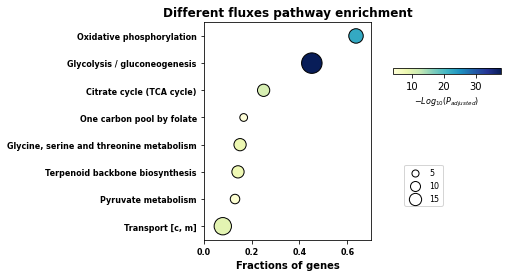

In [65]:
# plot pathway enrichment result
ax=geneset_plot(df_pathway_enrich,
                num=10,node_size=[5,10,15],
                cax_loc=1,
                cax_fontsize=8,
                fig_title='Different fluxes pathway enrichment',
                fig_xlabel='Fractions of genes',
                figsize=(3,4),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
ax.set_ylim(-0.5,7.5)
ax.set_xlim(0,0.7)
plt.show()

In [103]:
# df_gly_subpathway['num']=df_gly_subpathway['num']*5
# df_gly_subpathway

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
0,CUSTOM140249394362624,Anaerobic_fermentation,3/6,1.192435e-04,4.173523e-04,29.867905,r_0173;r_0165;r_2115,9.034343,3.396784,15,0.500000
8,CUSTOM140249394362624,Glycolysis / gluconeogenesis,14/31,3.524489e-17,7.401426e-16,29.913150,r_0886;r_0893;r_0467;r_0959;r_0534;r_2115;r_03...,37.884211,3.398298,70,0.451613
9,CUSTOM140249394362624,Glycolysis_downstream,7/9,2.045968e-11,2.148267e-10,46.313869,r_0893;r_0534;r_0366;r_0486;r_0962;r_1054;r_0892,24.612565,3.835441,35,0.777778
10,CUSTOM140249394362624,Glycolysis_upstream,3/8,3.250030e-04,8.531328e-04,22.828803,r_0886;r_0467;r_0450,8.031676,3.128023,15,0.375000


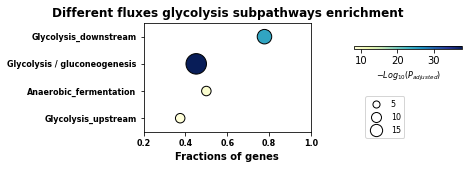

In [66]:
# glycolisis subpathways enrichment result
ax=geneset_plot(df_gly_subpathway,
                num=4,node_size=[5,10,15],
                cax_loc=1.1,
                cax_fontsize=8,
                fig_title='Different fluxes glycolysis subpathways enrichment',
                fig_xlabel='Fractions of genes',
                figsize=(3,2),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
# set ax x-axis range
ax.set_xlim(0.2,1.0)
ax.set_ylim(-0.5,3.5)
plt.show()

- conclusion:
1. According to pathway enrichment result, oxidative phosporolation and glycolisis pathway show more different in fluxes comparing to wild type.
2. According to subpathway analysis, downstream of glycolisis may have a more important influence to anaerobic condition.


#### 2.different transcription analysis at reaction level: Wildtype vs anaerobic related clades

In [4]:
# load differnet flux analysis result
df_exp_sig_diff=pd.read_csv('code/7.anaerobic_growth_analysis/output/bioethanol_vs_wt_diff_exp.csv',index_col=0)
df_exp_sig_diff

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
r_0001,0.001424,0.003425,0.711656,2.846607,2.465381,561.030121,9.131934,-0.490748,0.490748,0.071166,normal
r_0002,0.009931,0.021422,0.841190,2.003010,1.669136,100.877215,6.656457,-0.249497,0.249497,0.084119,normal
r_0003,0.011222,0.021991,1.299696,1.949916,1.657747,371.082869,8.535598,0.378174,0.378174,0.129970,normal
r_0004,0.459009,0.560300,0.785993,0.338179,0.251579,224.846817,7.812799,-0.347413,0.347413,0.078599,normal
r_0005,0.545195,0.650134,0.956632,0.263448,0.186997,151.642714,7.244532,-0.063964,0.063964,0.095663,normal
...,...,...,...,...,...,...,...,...,...,...,...
r_4589,0.000002,0.000005,2.274394,5.715898,5.272583,134.059490,7.066730,1.185482,1.185482,0.227439,up
r_4590,0.084514,0.137955,0.849459,1.073074,0.860261,74.329911,6.215871,-0.235383,0.235383,0.084946,normal
r_4591,0.019024,0.035699,0.225958,1.720694,1.447342,211.514717,7.724614,-2.145873,2.145873,0.022596,down
r_4592,0.069810,0.116120,0.844702,1.156080,0.935094,74.558164,6.220294,-0.243486,0.243486,0.084470,normal


- plot volcano plot by omicverse package in wsl 

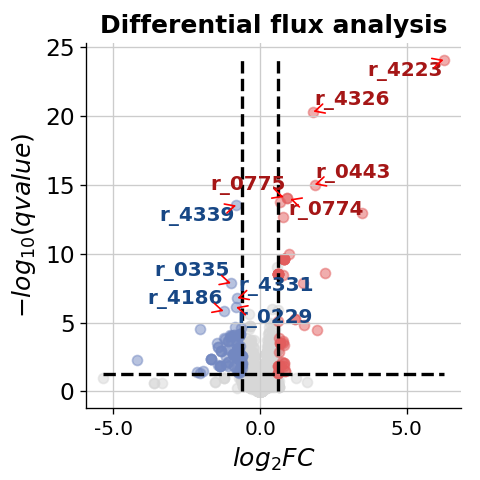
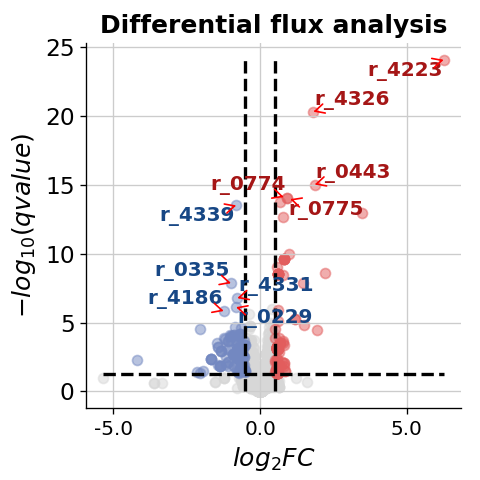

##### different expression reaction pathway enrichment

In [9]:
# load pathway enrichment result
df_exp_pathway_enrich=pd.read_csv('code/7.anaerobic_growth_analysis/output/bioethanol_vs_wt_diff_exp_pathway_enrichment_analysis.csv',index_col=0)
# remove rows which contain Transport
df_exp_pathway_enrich=df_exp_pathway_enrich[~df_exp_pathway_enrich['Term'].str.contains('Transport')]
df_exp_pathway_enrich

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
2,CUSTOM139680458451840,Arginine biosynthesis,3/11,5.638996e-03,2.380909e-02,8.826087,r_0818;r_0761;r_0207,5.178049,2.177712,3,0.272727
4,CUSTOM139680458451840,Biosynthesis of unsaturated fatty acids,15/44,6.673797e-12,1.268021e-10,10.968468,r_2232;r_0845;r_2233;r_0850;r_2155;r_2152;r_21...,25.732832,2.395025,15,0.340909
5,CUSTOM139680458451840,Biotin metabolism,3/5,3.991403e-04,3.033466e-03,18.482114,r_0146;r_0335;r_0229,7.826198,2.916803,3,0.600000
6,CUSTOM139680458451840,Citrate cycle (TCA cycle),5/20,4.968467e-04,3.146696e-03,7.876798,r_2305;r_0658;r_0280;r_0302;r_0303,7.607229,2.063921,5,0.250000
7,CUSTOM139680458451840,Complex alcohol metabolism,3/21,3.521659e-02,9.558790e-02,4.709176,r_0181;r_0184;r_0168,3.346238,1.549513,3,0.142857
8,CUSTOM139680458451840,Cysteine and methionine metabolism,9/31,6.410066e-07,8.119417e-06,9.096556,r_0544;r_0308;r_0312;r_0085;r_4186;r_0812;r_08...,14.260226,2.207896,9,0.290323
11,CUSTOM139680458451840,Galactose metabolism,3/10,4.208112e-03,1.998853e-02,9.669073,r_0459;r_1071;r_4222,5.470741,2.268932,3,0.300000
12,CUSTOM139680458451840,Glutathione metabolism,4/26,1.181818e-02,4.082644e-02,4.941818,r_4199;r_0481;r_0482;r_4205,4.438116,1.597733,4,0.153846
19,CUSTOM139680458451840,Phenylalanine metabolism,2/8,2.967451e-02,9.396928e-02,8.474594,r_0185;r_0171,3.517467,2.137073,2,0.250000
20,CUSTOM139680458451840,"Phenylalanine, tyrosine and tryptophan biosynt...",3/21,3.521659e-02,9.558790e-02,4.709176,r_2118;r_2117;r_2119,3.346238,1.549513,3,0.142857


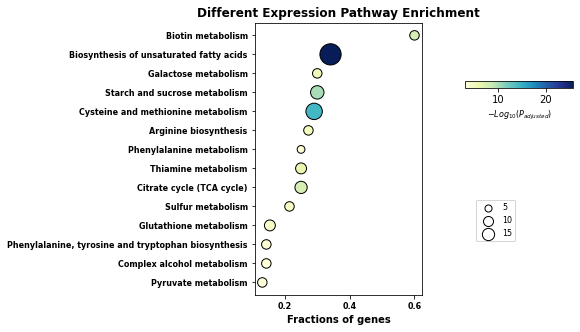

In [12]:
# plot pathway enrichment result
ax=geneset_plot(df_exp_pathway_enrich,
                num=15,node_size=[5,10,15],
                cax_loc=1.1,
                cax_fontsize=8,
                fig_title='Different Expression Pathway Enrichment',
                fig_xlabel='Fractions of genes',
                figsize=(3,5),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
# ax.set_ylim(-0.5,7.5)
# ax.set_xlim(0,0.7)

plt.show()

- TPM different expression analysis show a very different result with flux analysis: Glycolisis and Oxidative phosporalation which show significant different in flux do not show significant different in transcriptional level.
The main reasons for the conflict result between flux and TPM analysis: 
1. First is because the culture/simulation conditions are different.As for predicted flux, we try to mimic the original enviromental niche for different type strains, wild type strains were simulated at aerobic condition and the bioethanol strains were simulated at anaerobic condition to produce more ethanol.
2. Second is that transcriptional regulation may be not the major facter to regulate the flux of glycolisis pathway.

#### 3.Some reaction mean TPM comparision: bioethano vs wild type
- down_glycolisis: r_0893;r_0534;r_0366;r_0486;r_0962;r_1054;r_0892
- up_glycolisis: r_0886;r_0467;r_0450
- Anerobic_fermentation:r_0173;r_0165;r_2115
- TCA cycle: r_0452;r_0303;r_2305;r_2131;r_0713
- Oxidative phosphorylation:r_0439;r_0770;r_0773;r_0226;r_0438;r_0568;r_0569

In [62]:
# rxn_tpmMatrix data
rxn_tpmMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/sce969_rxn_tpmMatrix.csv',index_col=0).T
# downgly_rxnlist=['r_0893','r_0534','r_0366','r_0486','r_0962','r_0892']
# upgly_rxnlist=['r_0886','r_0467','r_0450','r_4288','r_4285','r_4284']
# af_rxnlist=['r_0173','r_0165','r_2115']
# tca_rxnlist=['r_0452','r_0303','r_2305','r_2131','r_0713']
# op_rxnlist=['r_0439','r_0770','r_0773','r_0226','r_0438','r_0568','r_0569']

# re define the pathway rxnlist
downgly_rxnlist=['r_1054','r_0486','r_0892','r_0893','r_0366','r_0962','r_0961']
upgly_rxnlist=['r_0534','r_0467','r_0886','r_0450']
af_rxnlist=['r_0959','r_2115','r_0173']
tca_rxnlist=['r_0300','r_0280','r_0658','r_1022','r_1021','r_0451','r_0713']
op_rxnlist=['r_0773','r_0439','r_0438','r_0226']

rxn_tpmMatrix=rxn_tpmMatrix[downgly_rxnlist+upgly_rxnlist+af_rxnlist+tca_rxnlist+op_rxnlist]
# transferm rxn_tpmMatrix to log2(tpm+1)
rxn_tpmMatrix=np.log2(rxn_tpmMatrix+1)
rxn_tpmMatrix

,r_1054,r_0486,r_0892,r_0893,r_0366,r_0962,r_0961,r_0534,r_0467,r_0886,...,r_0280,r_0658,r_1022,r_1021,r_0451,r_0713,r_0773,r_0439,r_0438,r_0226
CNF_4.re,11.818326,13.446050,10.978801,10.964422,12.570756,10.084108,6.925634,8.636614,9.670014,7.818270,...,7.211531,6.476416,7.131339,6.839528,7.423121,7.634124,6.379921,7.577826,7.407885,7.789582
ACS_2.re,11.667873,13.321644,11.042627,11.255112,11.776935,10.022695,6.657637,9.749068,9.370770,7.773496,...,9.137677,7.926686,7.942187,7.721812,8.322373,8.838683,8.111617,8.824386,8.523289,8.744920
CBA_3.re,10.820992,12.934142,10.402234,10.700164,12.020969,10.666356,7.193052,9.287223,9.202994,7.355329,...,7.011007,6.884661,7.982215,6.794665,7.354369,8.033263,7.270404,8.001441,7.788930,7.506980
YBK.re,11.279475,12.845111,9.852390,9.878652,11.173262,9.223059,6.628605,10.192681,9.071045,7.845189,...,7.789262,7.041374,7.427777,6.857302,7.666793,7.933178,7.630139,8.188610,8.404157,8.139813
CIT_3.re,11.724492,12.863612,10.702051,10.647602,12.776240,10.180675,6.588018,8.723620,9.230152,7.419790,...,7.118296,5.685882,6.800879,6.609577,7.000823,7.517415,5.947640,6.818874,6.626183,7.419166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACV_2.re,11.933015,13.974721,11.450359,11.275900,12.372133,11.071925,6.711550,10.773191,9.521259,7.395639,...,8.399137,7.552979,8.117582,8.453305,7.845608,9.616097,8.047107,8.735846,7.949772,8.225488
AQQ_4.re,12.221456,14.187501,11.820531,11.927747,13.411677,10.494109,6.439494,9.452492,9.553994,7.323935,...,7.211637,6.594073,7.243909,7.069810,6.696809,7.996336,6.792959,7.255455,6.873857,7.351444
CCL_1.re,11.497472,13.670921,11.324366,11.247972,12.007027,9.938854,6.729982,10.793342,9.413722,7.308108,...,8.677332,7.519294,8.241022,8.213851,8.041461,9.341567,8.219066,9.023639,8.497525,8.892604
AGV_2.re,11.933434,13.963481,11.701082,11.583267,13.326003,10.872996,6.708297,10.194589,9.759588,7.143860,...,6.390808,6.968200,8.388194,7.122144,7.298782,8.496580,7.482137,7.848884,7.220074,7.646696


In [63]:
# load strain information data
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
df_strain_info=df_strain_info[df_strain_info.index.isin(rxn_tpmMatrix.index)]

wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','16. CHNI ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist))&(df_strain_info['sub_type'].isin(['Wild','Soil']))].index.tolist()

bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ')&(df_strain_info['sub_type'].isin(['Bioethanol']))].index.tolist()

In [64]:
rxn_tpmMatrix.loc[wt_strainList,'type']='wildtype'
rxn_tpmMatrix.loc[bioethanol_strainList,'type']='bioethanol'

# remove strains with nan in type column
rxn_tpmMatrix=rxn_tpmMatrix[~rxn_tpmMatrix['type'].isna()]
# sort rxn_tpmMatrix by type column
rxn_tpmMatrix=rxn_tpmMatrix.sort_values(by='type',ascending=False)
rxn_tpmMatrix

,r_1054,r_0486,r_0892,r_0893,r_0366,r_0962,r_0961,r_0534,r_0467,r_0886,...,r_0658,r_1022,r_1021,r_0451,r_0713,r_0773,r_0439,r_0438,r_0226,type
AGR_2.re,11.594632,13.226887,10.956146,11.233470,12.673822,9.942293,6.638221,11.101729,9.047384,7.907801,...,9.463754,7.973501,9.625459,8.668462,10.540597,10.006632,10.328352,9.694333,9.795498,wildtype
CEI_2.re,11.421441,13.676159,11.404295,11.047626,12.352932,9.991283,6.222395,10.877820,9.768459,7.877613,...,7.766962,8.537839,7.934653,7.840903,9.348623,7.827310,8.667242,7.941477,8.112183,wildtype
CDI_1.re,10.778607,13.587574,10.777171,11.162191,11.979961,10.398478,7.462132,10.802245,9.060497,7.387134,...,8.234804,8.106838,7.011476,7.806227,8.570055,8.362373,8.228021,8.027059,8.078590,wildtype
CCQ_1.re,11.955959,13.718160,11.137585,10.957001,12.730872,9.962631,6.479978,9.168758,9.563896,7.742207,...,6.457580,7.193059,6.860159,7.292639,8.355102,6.856912,8.003872,7.737117,7.975165,wildtype
ARG_5.re,12.168619,13.975603,11.396849,11.192575,12.770739,10.333505,6.930765,10.748560,9.606796,7.970946,...,7.036243,7.315932,7.141174,7.090041,8.381168,7.008145,7.791236,7.207983,7.718507,wildtype
BMB_1.re,12.251530,14.051571,11.671666,11.625783,12.834270,10.243779,6.310031,10.297976,9.390117,7.369335,...,6.596773,7.425013,6.906277,7.113496,8.465500,6.966707,8.137053,7.766761,8.290110,wildtype
CEG_4.re,11.686410,13.691969,11.223317,11.241187,12.577899,10.291897,6.011193,9.023805,9.583625,7.589265,...,7.281798,8.639546,6.771700,7.557883,8.734945,7.182858,8.531130,7.960391,8.257417,wildtype
CCS_1.re,11.722054,13.873745,11.538496,11.459870,12.251980,10.245216,6.781587,10.535381,9.648806,7.429315,...,7.331795,7.834949,8.034365,8.009825,9.036174,8.024210,8.694377,8.228601,8.561968,wildtype
AMH_5.re,11.799326,13.539790,11.329367,11.411520,12.280575,10.279025,6.146476,9.022633,9.884325,7.839169,...,7.720415,8.693112,7.165152,7.708105,8.769251,7.646095,8.725635,8.031131,8.304098,wildtype
CCR_1.re,11.656171,13.662181,11.283495,10.821645,12.379963,10.049294,6.736452,11.129127,9.695794,7.502438,...,7.282771,7.747372,8.162438,7.792805,9.538926,8.317572,8.839859,8.355834,8.366797,wildtype


In [65]:
# save rxn_tpmMatrix-
rxn_tpmMatrix.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/bioethanol_vs_wt_rxn_tpmMatrix.csv')

r_1054 0.0013976055980045106
r_0486 0.11582869736501791
r_0892 0.026424873139169237
r_0893 0.022607511528475656
r_0366 0.0001703730896244206
r_0962 0.03957680770483605
r_0961 0.00248241434136198
r_0534 0.34327179176907197
r_0467 4.6275059722618845e-05
r_0886 0.39579283773731255
r_0450 0.0389838174577101
r_0959 0.15761419683982844
r_2115 0.23218785018130575
r_0173 0.8380992163039961


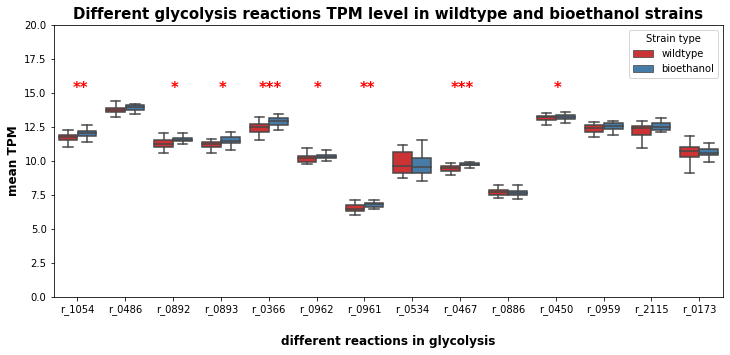

In [66]:
# calculate the p value of different rxn between wildtype and bioethanol strains
pvalue_list=[]
for rxn in downgly_rxnlist+upgly_rxnlist+af_rxnlist:
    pvalue=stats.ttest_ind(rxn_tpmMatrix[rxn_tpmMatrix['type']=='wildtype'][rxn],rxn_tpmMatrix[rxn_tpmMatrix['type']=='bioethanol'][rxn])[1]
    print(rxn,pvalue)
    pvalue_list.append(pvalue)

# compare different glycolisis reactions TPM level in one grouped boxplot plot
fig,ax=plt.subplots(figsize=(12,5))
# plot groped boxplot
# convert different rxn columns into one column
df=pd.melt(rxn_tpmMatrix,id_vars=['type'],value_vars=downgly_rxnlist+upgly_rxnlist+af_rxnlist)
# plot grouped boxplot and show the points
sns.boxplot(x='variable',y='value',hue='type',data=df,ax=ax,palette="Set1",showfliers=False)
ax.set_ylim(0,20)

# add * to the top accoding to p value: p_value<0.001: ‘***’, p_value<0.01: ‘**’, p_value<0.05: ‘*’
sig_fontdict={'fontsize':15,'weight':'bold','color':'red'}
for i in range(len(pvalue_list)):
    if pvalue_list[i]<0.001:
        ax.text(i-0.2, 15, '***', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.01:
        ax.text(i-0.1,15, '**', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.05:
        ax.text(i-0.05, 15, '*', fontdict=sig_fontdict)

axis_fontdict={'fontsize':12,'weight':'bold'}    
ax.set_ylabel('mean TPM',fontdict=axis_fontdict)
ax.set_xlabel('different reactions in glycolysis',fontdict=axis_fontdict,labelpad=20)
ax.set_title('Different glycolysis reactions TPM level in wildtype and bioethanol strains',fontsize=15,weight='bold')
# set legend title
ax.legend(title='Strain type')
plt.show()


r_0300 0.006085953456305205
r_0280 9.997109955205019e-06
r_0658 0.0004198323092014713
r_1022 0.03667368100565229
r_1021 0.49412229744858605
r_0451 0.0011747630740341162
r_0713 0.0004285718272895377
r_0773 0.0012570908045501635
r_0439 0.00018062810836234403
r_0438 0.002855376897539451
r_0226 0.00043249967820627926


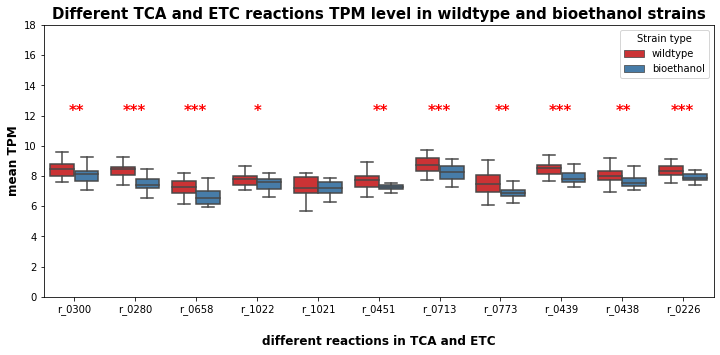

In [67]:
# calculate the p value of different rxn between wildtype and bioethanol strains
pvalue_list=[]
for rxn in tca_rxnlist+op_rxnlist:
    pvalue=stats.ttest_ind(rxn_tpmMatrix[rxn_tpmMatrix['type']=='wildtype'][rxn],rxn_tpmMatrix[rxn_tpmMatrix['type']=='bioethanol'][rxn])[1]
    print(rxn,pvalue)
    pvalue_list.append(pvalue)

# compare different TCA and Oxidative phosphoralation reactions TPM level in one grouped boxplot plot
fig,ax=plt.subplots(figsize=(12,5))
# plot groped boxplot
# convert different rxn columns into one column
df=pd.melt(rxn_tpmMatrix,id_vars=['type'],value_vars=tca_rxnlist+op_rxnlist)
# plot grouped boxplot, do not show outliers
sns.boxplot(x='variable',y='value',hue='type',data=df,ax=ax,palette="Set1",showfliers=False)
ax.set_ylim(0,18)
# add * to the top accoding to p value: p_value<0.001: ‘***’, p_value<0.01: ‘**’, p_value<0.05: ‘*’
sig_fontdict={'fontsize':15,'weight':'bold','color':'red'}
for i in range(len(pvalue_list)):
    if pvalue_list[i]<0.001:
        ax.text(i-0.2, 12, '***', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.01:
        ax.text(i-0.1,12 , '**', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.05:
        ax.text(i-0.05, 12, '*', fontdict=sig_fontdict)

axis_fontdict={'fontsize':12,'weight':'bold'}
ax.set_ylabel('mean TPM',fontdict=axis_fontdict)
# set x label lower to the bottom
ax.set_xlabel('different reactions in TCA and ETC',labelpad=20,fontdict=axis_fontdict)
ax.set_title('Different TCA and ETC reactions TPM level in wildtype and bioethanol strains',fontsize=15,weight='bold')
# set legend title
ax.legend(title='Strain type')
plt.show()

- conclusion:
1. According to glycolisis subpathways comparision, downstream of glycolisis showed more inscrease at transcription level comparing to upstream of glycolisis.That is consistent with flux analysis.
2. Many reactions involved in TCA cycle and ETC pathwya showed distint decrease in transcription. Indicate that in order to adapt the producing ethanol condition, strains evolved by reducing its TCA and ETC chain, increasing glycolisis especially downstream of glycolisis.

#### 4.Exploring other likely anaerobic related clades at transcriptional level: 
1. Wine/European ,10. French Guiana human ,6. African beer ,11. Ale beer ,25. Sake ,5. French dairy .

In [128]:
wine_strainList=df_strain_info[(df_strain_info['nature_clade']=='1. Wine/European ')&(df_strain_info['sub_type']=='Wine')].index.tolist()
human_strainList=df_strain_info[(df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['sub_type']=='Human')].index.tolist()
beer_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(['11. Ale beer ','6. African beer ']))&(df_strain_info['sub_type']=='Beer')].index.tolist()
sake_strainList=df_strain_info[(df_strain_info['nature_clade']=='25. Sake ')&(df_strain_info['sub_type']=='Sake')].index.tolist()
dairy_strainList=df_strain_info[(df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['sub_type']=='Dairy')].index.tolist()
wt_strainList=wt_strainList

In [143]:
# rxn_tpmMatrix data
rxn_tpmMatrix=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/sce969_rxn_tpmMatrix.csv',index_col=0).T
downgly_rxnlist=['r_1054','r_0486','r_0892','r_0893','r_0366','r_0962','r_0961']
upgly_rxnlist=['r_0534','r_0467','r_0886','r_0450']
af_rxnlist=['r_0959','r_2115','r_0173']
tca_rxnlist=['r_0300','r_0280','r_0658','r_1022','r_1021','r_0451','r_0713']
op_rxnlist=['r_0773','r_0439','r_0438','r_0226']

rxn_tpmMatrix=rxn_tpmMatrix[downgly_rxnlist+upgly_rxnlist+af_rxnlist+tca_rxnlist+op_rxnlist]
# transferm rxn_tpmMatrix to log2(tpm+1)
rxn_tpmMatrix=np.log2(rxn_tpmMatrix+1)
rxn_tpmMatrix

,r_1054,r_0486,r_0892,r_0893,r_0366,r_0962,r_0961,r_0534,r_0467,r_0886,...,r_0280,r_0658,r_1022,r_1021,r_0451,r_0713,r_0773,r_0439,r_0438,r_0226
CNF_4.re,11.818326,13.446050,10.978801,10.964422,12.570756,10.084108,6.925634,8.636614,9.670014,7.818270,...,7.211531,6.476416,7.131339,6.839528,7.423121,7.634124,6.379921,7.577826,7.407885,7.789582
ACS_2.re,11.667873,13.321644,11.042627,11.255112,11.776935,10.022695,6.657637,9.749068,9.370770,7.773496,...,9.137677,7.926686,7.942187,7.721812,8.322373,8.838683,8.111617,8.824386,8.523289,8.744920
CBA_3.re,10.820992,12.934142,10.402234,10.700164,12.020969,10.666356,7.193052,9.287223,9.202994,7.355329,...,7.011007,6.884661,7.982215,6.794665,7.354369,8.033263,7.270404,8.001441,7.788930,7.506980
YBK.re,11.279475,12.845111,9.852390,9.878652,11.173262,9.223059,6.628605,10.192681,9.071045,7.845189,...,7.789262,7.041374,7.427777,6.857302,7.666793,7.933178,7.630139,8.188610,8.404157,8.139813
CIT_3.re,11.724492,12.863612,10.702051,10.647602,12.776240,10.180675,6.588018,8.723620,9.230152,7.419790,...,7.118296,5.685882,6.800879,6.609577,7.000823,7.517415,5.947640,6.818874,6.626183,7.419166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACV_2.re,11.933015,13.974721,11.450359,11.275900,12.372133,11.071925,6.711550,10.773191,9.521259,7.395639,...,8.399137,7.552979,8.117582,8.453305,7.845608,9.616097,8.047107,8.735846,7.949772,8.225488
AQQ_4.re,12.221456,14.187501,11.820531,11.927747,13.411677,10.494109,6.439494,9.452492,9.553994,7.323935,...,7.211637,6.594073,7.243909,7.069810,6.696809,7.996336,6.792959,7.255455,6.873857,7.351444
CCL_1.re,11.497472,13.670921,11.324366,11.247972,12.007027,9.938854,6.729982,10.793342,9.413722,7.308108,...,8.677332,7.519294,8.241022,8.213851,8.041461,9.341567,8.219066,9.023639,8.497525,8.892604
AGV_2.re,11.933434,13.963481,11.701082,11.583267,13.326003,10.872996,6.708297,10.194589,9.759588,7.143860,...,6.390808,6.968200,8.388194,7.122144,7.298782,8.496580,7.482137,7.848884,7.220074,7.646696


In [144]:
# type: bioethanol, wine, human, beer, sake, dairy
type='Beer'
rxn_tpmMatrix.loc[wt_strainList,'type']='wildtype'
rxn_tpmMatrix.loc[beer_strainList,'type']=type

# remove strains with nan in type column
rxn_tpmMatrix=rxn_tpmMatrix[~rxn_tpmMatrix['type'].isna()]
# set wildtype as the first order
rxn_tpmMatrix=rxn_tpmMatrix.sort_values(by='type',ascending=False)
rxn_tpmMatrix

,r_1054,r_0486,r_0892,r_0893,r_0366,r_0962,r_0961,r_0534,r_0467,r_0886,...,r_0658,r_1022,r_1021,r_0451,r_0713,r_0773,r_0439,r_0438,r_0226,type
BMB_1.re,12.251530,14.051571,11.671666,11.625783,12.834270,10.243779,6.310031,10.297976,9.390117,7.369335,...,6.596773,7.425013,6.906277,7.113496,8.465500,6.966707,8.137053,7.766761,8.290110,wildtype
CDL_3.re,11.781545,13.912223,11.320874,11.405116,12.099150,9.948433,6.401198,9.701065,9.536600,7.405097,...,7.333838,7.556179,7.742050,7.749129,9.461948,7.718557,8.763514,8.372513,8.726890,wildtype
YCM.re,11.959177,13.812170,11.386061,11.375607,12.562853,10.163495,6.475399,9.294685,9.240826,7.891251,...,7.227255,7.720876,7.548106,7.296097,8.554810,7.368250,8.487858,8.083233,8.293489,wildtype
BAH_6.re,11.570878,13.525584,10.820396,10.572209,11.813469,10.006687,7.144081,9.117631,9.388882,8.078905,...,7.411248,7.537611,7.457039,8.075049,8.517944,7.324829,8.643395,8.342833,8.640064,wildtype
CCR_1.re,11.656171,13.662181,11.283495,10.821645,12.379963,10.049294,6.736452,11.129127,9.695794,7.502438,...,7.282771,7.747372,8.162438,7.792805,9.538926,8.317572,8.839859,8.355834,8.366797,wildtype
CCV_1.re,12.038764,13.741121,11.093709,11.134161,12.484700,10.212329,6.342080,8.906337,9.472591,7.691538,...,6.394518,7.181962,6.223039,7.178750,8.139756,6.908067,7.866436,7.577745,8.098254,wildtype
CDI_1.re,10.778607,13.587574,10.777171,11.162191,11.979961,10.398478,7.462132,10.802245,9.060497,7.387134,...,8.234804,8.106838,7.011476,7.806227,8.570055,8.362373,8.228021,8.027059,8.078590,wildtype
YCR.re,11.626481,13.688895,11.529586,11.295412,12.112202,9.940578,6.589397,9.641031,9.488913,7.637441,...,7.091311,7.809116,7.918371,7.753772,9.464342,7.503375,8.597745,8.260825,8.567403,wildtype
CCQ_1.re,11.955959,13.718160,11.137585,10.957001,12.730872,9.962631,6.479978,9.168758,9.563896,7.742207,...,6.457580,7.193059,6.860159,7.292639,8.355102,6.856912,8.003872,7.737117,7.975165,wildtype
CDH.re,11.845227,13.933230,11.467816,11.342109,12.594330,10.152963,6.410995,9.001749,9.244245,7.695786,...,7.021510,7.836283,6.054800,7.595164,8.190326,6.451846,8.468522,8.241383,8.112881,wildtype


In [145]:
# save rxn_tpmMatrix
rxn_tpmMatrix.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/%s_vs_wt_rxn_tpmMatrix.csv'%type)

r_1054 0.6863779323164885
r_0486 0.8501759054076843
r_0892 0.12165369018027909
r_0893 0.2719835907651119
r_0366 0.3299700136952095
r_0962 0.872943820359957
r_0961 0.04454200302877453
r_0534 0.11222193149229986
r_0467 0.03761318128519254
r_0886 0.0030883477003571694
r_0450 0.0023879805347240316
r_0959 0.08632550339025814
r_2115 7.680071561454032e-05
r_0173 0.23432502548783943


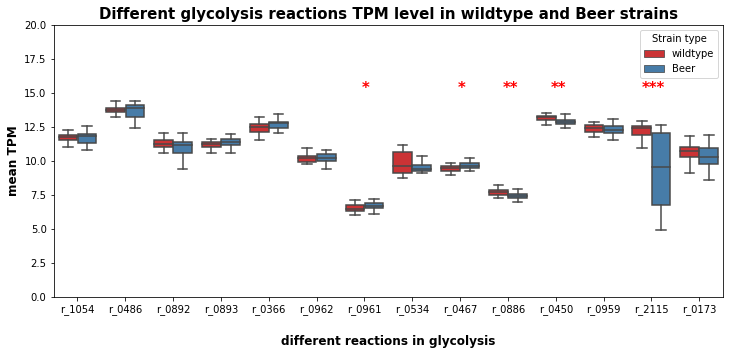

In [146]:
# calculate the p value of different rxn between wildtype and beer strains
pvalue_list=[]
for rxn in downgly_rxnlist+upgly_rxnlist+af_rxnlist:
    pvalue=stats.ttest_ind(rxn_tpmMatrix[rxn_tpmMatrix['type']=='wildtype'][rxn],rxn_tpmMatrix[rxn_tpmMatrix['type']==type][rxn])[1]
    print(rxn,pvalue)
    pvalue_list.append(pvalue)

# compare different glycolisis reactions TPM level in one grouped boxplot plot
fig,ax=plt.subplots(figsize=(12,5))
# plot groped boxplot
# convert different rxn columns into one column
df=pd.melt(rxn_tpmMatrix,id_vars=['type'],value_vars=downgly_rxnlist+upgly_rxnlist+af_rxnlist)
# plot grouped boxplot, do not show outliers
sns.boxplot(x='variable',y='value',hue='type',data=df,ax=ax,palette="Set1",showfliers=False,hue_order=['wildtype',type])
# show the points in the boxplot
# sns.swarmplot(x='variable',y='value',hue='type',data=df,ax=ax,color='black',alpha=0.5)

ax.set_ylim(0,20)
# add * to the top accoding to p value: p_value<0.001: ‘***’, p_value<0.01: ‘**’, p_value<0.05: ‘*’
sig_fontdict={'fontsize':15,'weight':'bold','color':'red'}
for i in range(len(pvalue_list)):
    if pvalue_list[i]<0.001:
        ax.text(i-0.2, 15, '***', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.01:
        ax.text(i-0.1,15 , '**', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.05:
        ax.text(i-0.05, 15, '*', fontdict=sig_fontdict)

axis_fontdict={'fontsize':12,'weight':'bold'}
ax.set_ylabel('mean TPM',fontdict=axis_fontdict)
# set x label lower to the bottom
ax.set_xlabel('different reactions in glycolysis',labelpad=20,fontdict=axis_fontdict)
ax.set_title('Different glycolysis reactions TPM level in wildtype and %s strains'%type,fontsize=15,weight='bold')
# set legend title
ax.legend(title='Strain type')
plt.show()

r_0300 0.039758726600230006
r_0280 1.2369200977500673e-05
r_0658 0.0070407277200884326
r_1022 0.0003893688973773509
r_1021 0.001691939520155066
r_0451 3.9481364180353383e-07
r_0713 1.1098604870792406e-05
r_0773 0.0027636426317251286
r_0439 1.1546226016060042e-05
r_0438 1.759650629837055e-07
r_0226 3.7467399482813526e-07


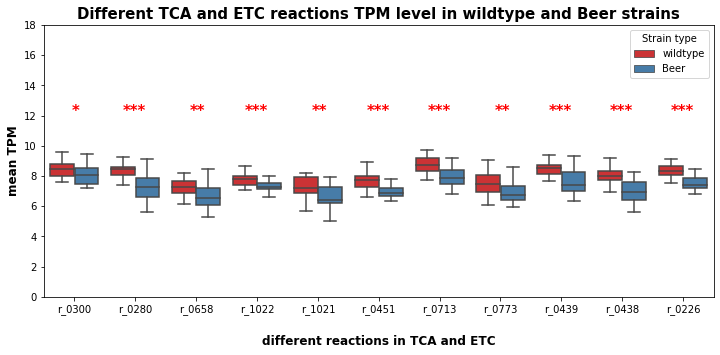

In [147]:
# calculate the p value of different rxn between wildtype and beer strains
pvalue_list=[]
for rxn in tca_rxnlist+op_rxnlist:
    pvalue=stats.ttest_ind(rxn_tpmMatrix[rxn_tpmMatrix['type']=='wildtype'][rxn],rxn_tpmMatrix[rxn_tpmMatrix['type']==type][rxn])[1]
    pvalue_list.append(pvalue)
    print(rxn,pvalue)

# compare different TCA and ETC reactions TPM level in one grouped boxplot plot
fig,ax=plt.subplots(figsize=(12,5))
# plot groped boxplot
# convert different rxn columns into one column
df=pd.melt(rxn_tpmMatrix,id_vars=['type'],value_vars=tca_rxnlist+op_rxnlist)
# plot grouped boxplot, do not show outliers
sns.boxplot(x='variable',y='value',hue='type',data=df,ax=ax,palette="Set1",showfliers=False,hue_order=['wildtype',type])
ax.set_ylim(0,18)
# add * to the top accoding to p value: p_value<0.001: ‘***’, p_value<0.01: ‘**’, p_value<0.05: ‘*’
sig_fontdict={'fontsize':15,'weight':'bold','color':'red'}
for i in range(len(pvalue_list)):
    if pvalue_list[i]<0.001:
        ax.text(i-0.2, 12, '***', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.01:
        ax.text(i-0.1,12 , '**', fontdict=sig_fontdict)
    elif pvalue_list[i]<0.05:
        ax.text(i-0.05, 12, '*', fontdict=sig_fontdict)

axis_fontdict={'fontsize':12,'weight':'bold'}
ax.set_ylabel('mean TPM',fontdict=axis_fontdict)
# set x label lower to the bottom
ax.set_xlabel('different reactions in TCA and ETC',labelpad=20,fontdict=axis_fontdict)
ax.set_title('Different TCA and ETC reactions TPM level in wildtype and %s strains'%type,fontsize=15,weight='bold')
# set legend title
ax.legend(title='Strain type')
plt.show()

- Conculusion:
1. Anaerobic related niche shows a power to shape the transcriptional patteren in central carbon metabolism. Bioethanol, Beer, Human, Sake, Dairy strains all show lower transcription level in ETC to adapt the anaerobic conditions.
2. However, different anaerobic condition make different influence to TCA pathway and glycolisis.